STROKE PREDICTION MODEL USING DECISION TREES


In [2]:
#importing necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv("strokedata.csv")


In [5]:
data = pd.read_csv("strokedata.csv") #READING IN THE DATASET
print(data.describe())  #DATASET DESCRIPTION
data = data.drop(columns = ['id'])    #DROPPING THE ID COLUMN BECAUSE IT IS NOT OF USE 


                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

DATA VISUALISATIONS

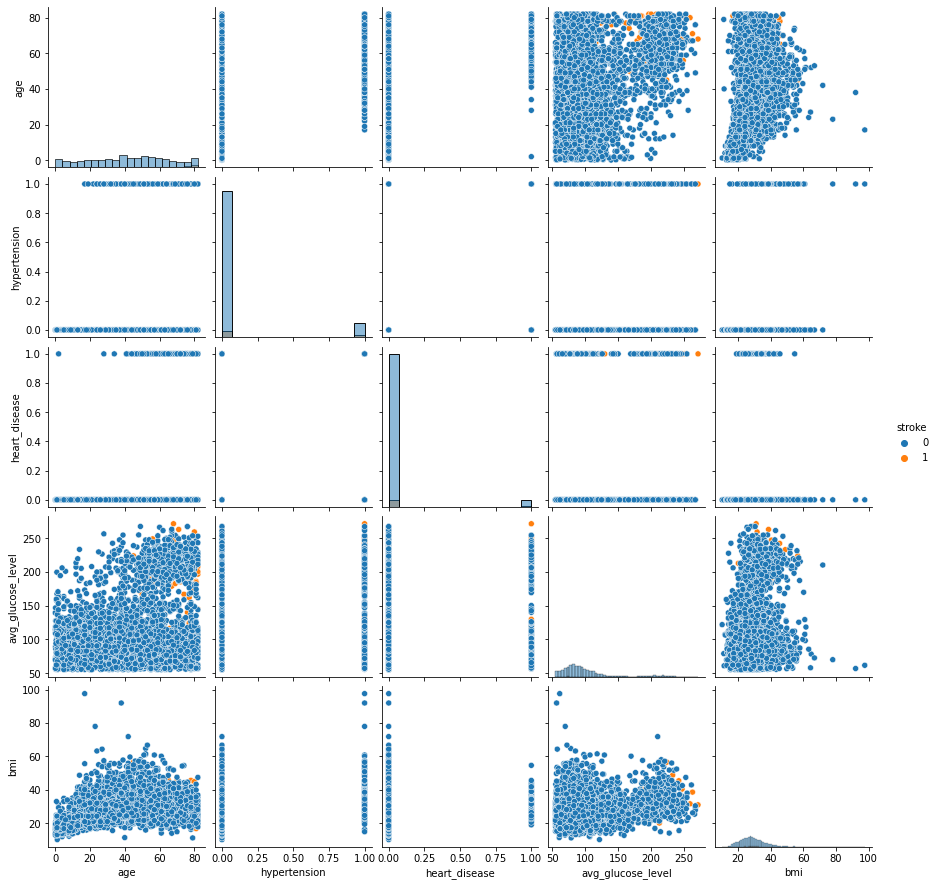

In [7]:
from matplotlib import pyplot  as plt
import seaborn as sns

#DATASET VISUALISATION USING PAIRPLOT
sns.pairplot(data,diag_kind="hist",hue="stroke")   #The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset.


The Following Visualisations were done On Rapid Miner

Image 1 shows the age and gender relationship of the dataset used using scatter/bubble plot
Image 2 shows the relationship between marital status and stroke occurence using Pareto
Image 3 shows the relationship between smoking status and occurence of stroke using Barplot
Image 4 shows the stroke and non stroke frequency count using histogram plot

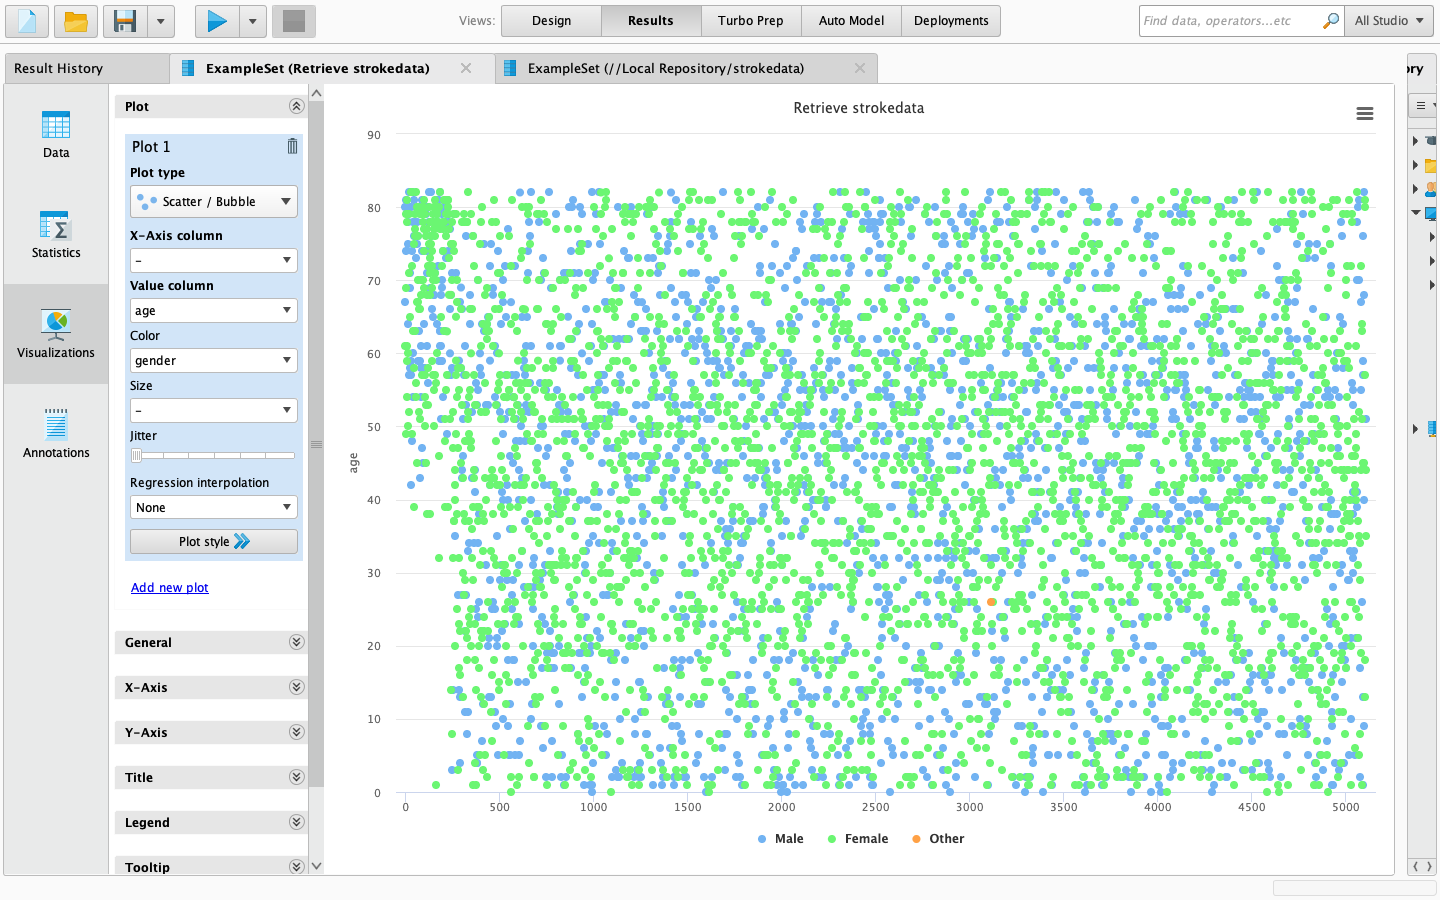

In [4]:
from IPython import display
display.Image("/Users/shreeyarao/Desktop/dmpa/age_gender_scatterplot.png")



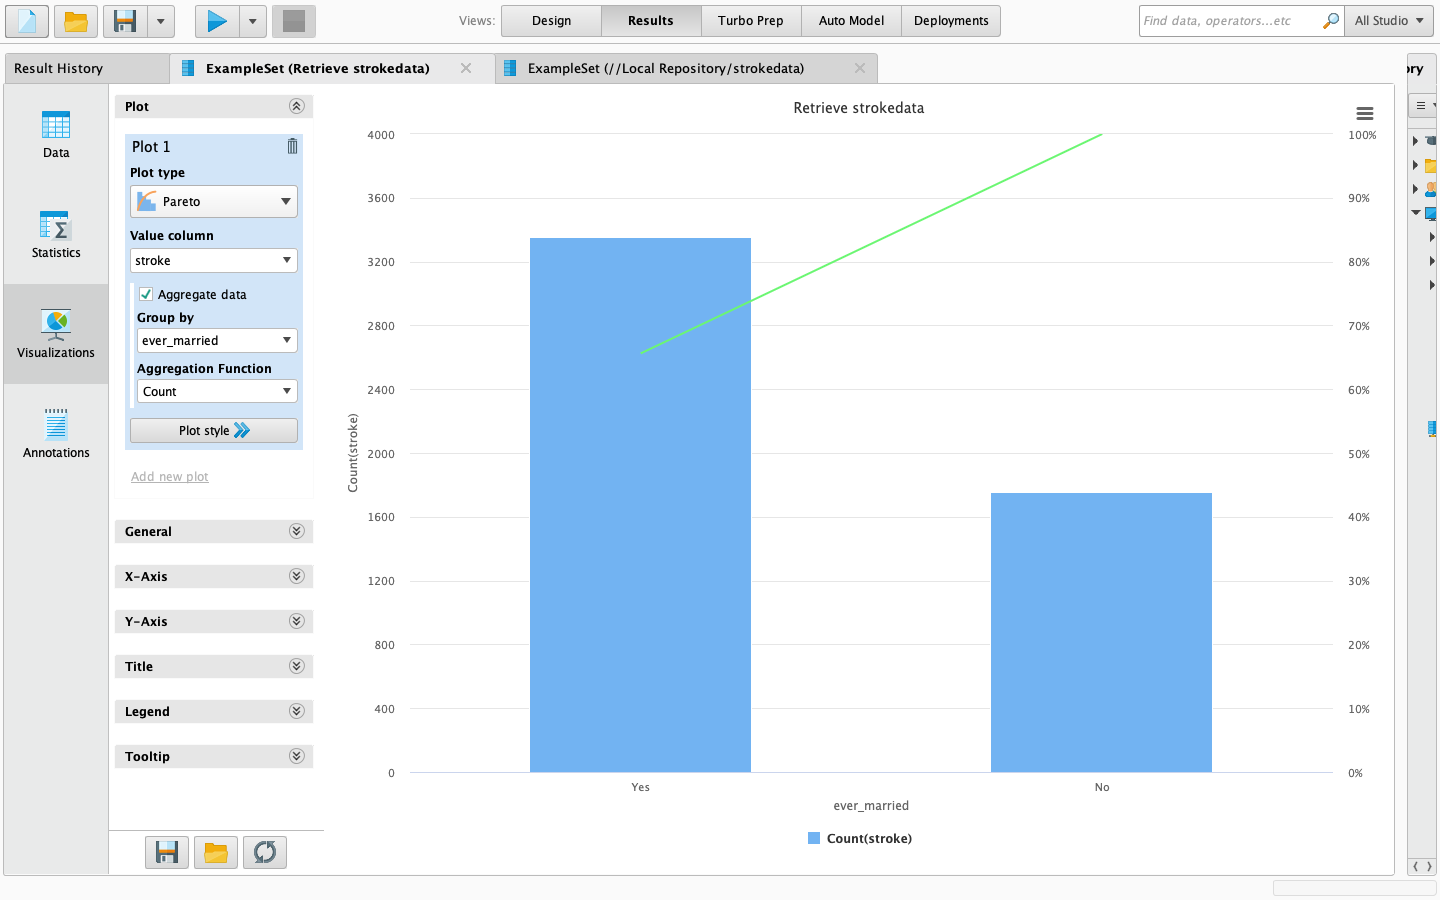

In [3]:
display.Image("/Users/shreeyarao/Desktop/dmpa/Screen Shot 2022-10-27 at 12.56.35 PM.png")

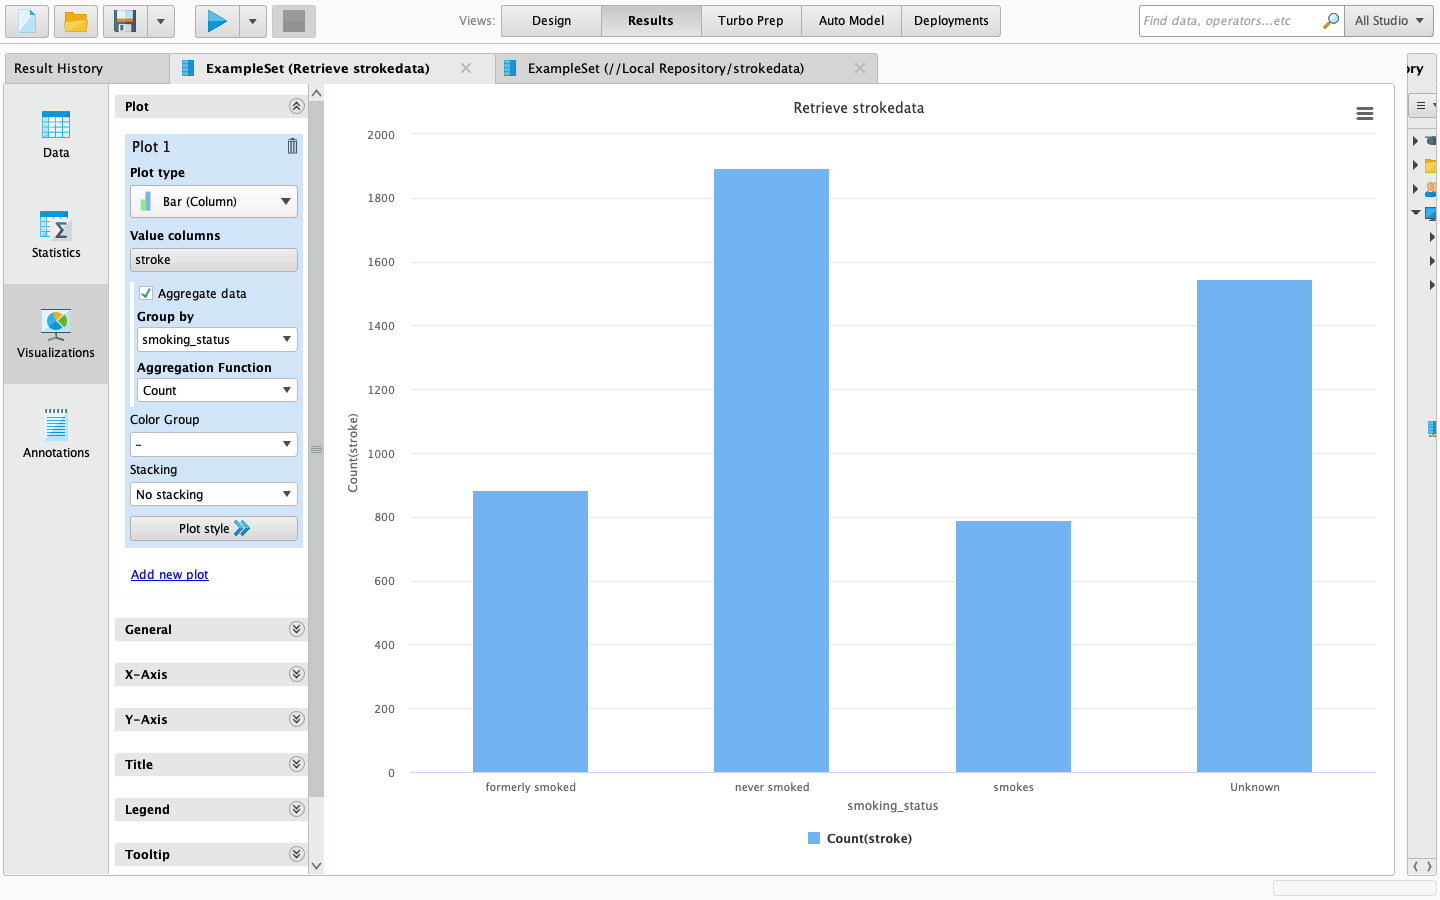

In [7]:
display.Image("/Users/shreeyarao/Desktop/dmpa/Screen Shot 2022-10-27 at 12.57.09 PM.png")

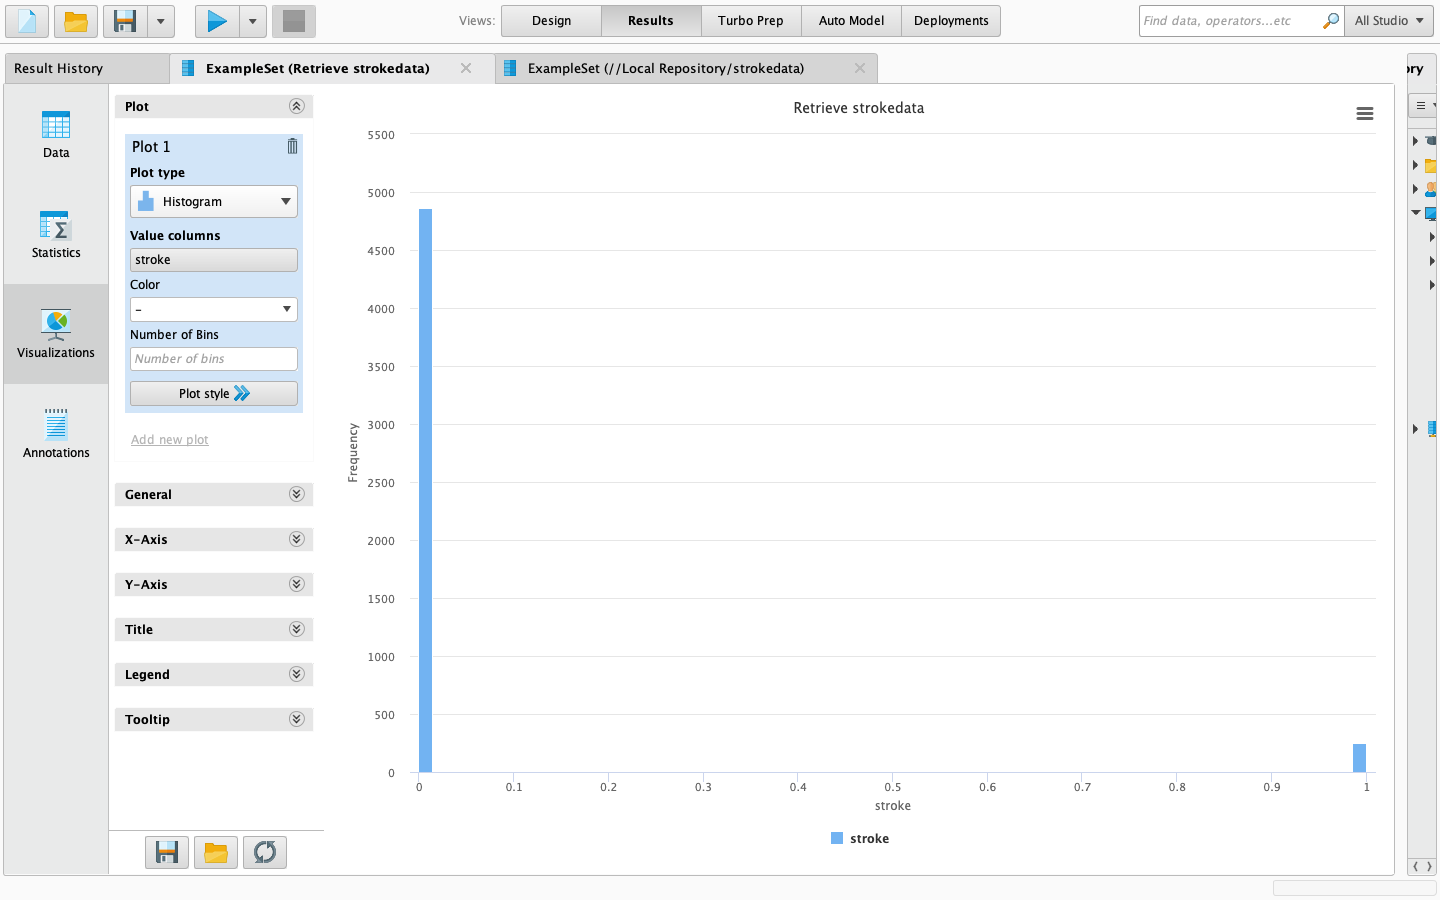

In [8]:
display.Image("/Users/shreeyarao/Desktop/dmpa/stroke_y_n_hist.png")

DATA PREPROCESSING

Data pre processing involves:
checking for duplicate values
checking for null values and replacing them with the average value 
converting string values to numeric values
removing unwanted classes
one hot encoding 
sorting out data imbalance issue




In [9]:
#CHECKING FOR DUPLICATED VALUES
print('the number of duplicate values is ')
#print(data.duplicated().sum())
#CHECKING FOR NULL VALUES AND REPLACING THEM WITH AVERAGE VALUE OF THE CLASS
print(data.isnull().sum())  
data.fillna(data['bmi'].mean() , inplace = True)
#FINDING THE UNIQUE VALUES TAKEN BY EACH CLASS
print(data['smoking_status'].unique())
print(data['ever_married'].unique())
print(data['work_type'].unique())
print(data['Residence_type'].unique())
print(data.isnull().sum())


the number of duplicate values is 
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [10]:
data.drop(data.loc[data['smoking_status']=='Unknown'].index, inplace=True)    #removing unwanted classes
data = pd.get_dummies(data, columns = ['gender' , 'work_type', 'Residence_type' , 'smoking_status' , 'ever_married']) #ONE HOT ENCODING
data.head()



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [11]:
d = data.stroke.value_counts()
print(d)
#DATA IS IMBALANCED. NUMBER OF NON STROKE PATIENTS' DATA IS A LOT MORE THAN THE NUMBER OF STROKE PATIENTS' DATA. HENCE UPSAMPLE THE STROKE PATIENTS DATA
from sklearn.utils import resample
df_1 = data[data.stroke==0]
df_2 = data[data.stroke==1]
 # Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=3364,    # to match majority class
                                 random_state=180) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])

d = df_upsampled.stroke.value_counts()
print(d)
 

0    3364
1     202
Name: stroke, dtype: int64
0    3364
1    3364
Name: stroke, dtype: int64


In [12]:
df_upsampled.reset_index(drop=True)
#The reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes. By default this method will keep the "old" indexes in a column named "index", to avoid this, use the drop parameter.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes
0,58.0,1,0,87.96,39.2,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
1,70.0,0,0,69.04,35.9,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,52.0,0,0,77.59,17.7,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1
3,75.0,0,1,243.53,27.0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
4,32.0,0,0,77.67,32.3,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723,63.0,0,0,208.65,30.7,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
6724,54.0,0,0,96.97,29.1,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
6725,54.0,0,0,87.85,31.1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
6726,66.0,0,0,76.46,21.2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


CLASSIFICATION USING DECISION TREE 

In [13]:
#SPLITTING THE DATA INTO TRAINING AND TEST SET. SCALING THE TRAINING AND TEST FEATURES
target = df_upsampled[["stroke"]]
final_features = df_upsampled[['age' , 'bmi' , 'avg_glucose_level']]

#Scaling the features using MinMax Scalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(final_features,target,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)


UPSAMPLED DATA VISUALISATION USING CORRELATION MATRIX

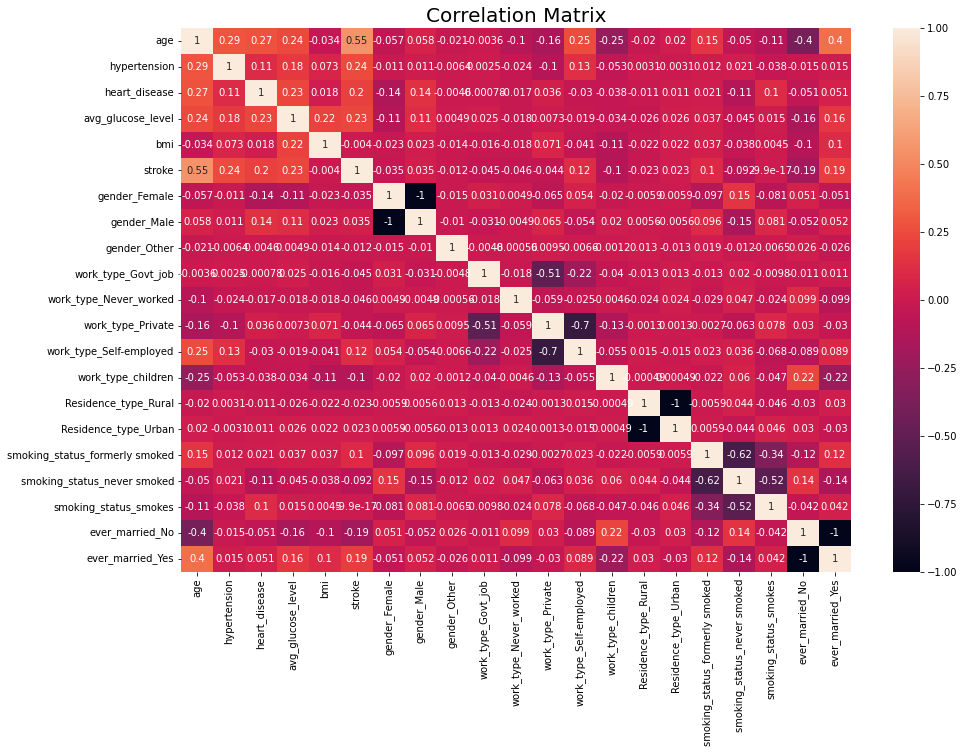

In [14]:
#checking correlation between the variables
plt.figure(figsize=(15, 10))
sns.heatmap(df_upsampled.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

BUILDING THE DECISION TREE CLASSIFIER

In [120]:
#building the decision tree with max depth 18 and fitting the data to it
dtree = DecisionTreeClassifier(max_depth=18,random_state=0).fit(X_train_scaled, y_train)
tree_pred= dtree.score(X_test_scaled, y_test)

train_accuracy =dtree.score(X_train_scaled,y_train)
tree_accuracy = dtree.score(X_test_scaled,y_test)
pred_prob_tree = dtree.predict_proba(X_test_scaled)
#The predict method is used to predict the actual class while predict_proba method can be used to infer the class probabilities

print("Training score: ",train_accuracy )
print("Test score:", tree_accuracy)


Training score:  0.9786324786324786
Test score: 0.9598811292719168


CONFUSION MATRIX AND CLASSIFICATION REPORT

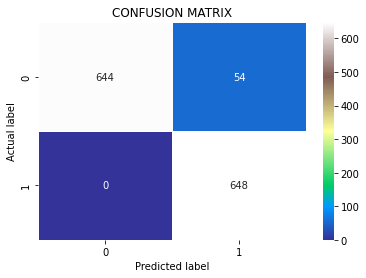

<Figure size 720x720 with 0 Axes>

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       698
           1       0.92      1.00      0.96       648

    accuracy                           0.96      1346
   macro avg       0.96      0.96      0.96      1346
weighted avg       0.96      0.96      0.96      1346



In [121]:
from sklearn import metrics
y_pred=dtree.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.9, square = False, cmap = 'terrain')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('CONFUSION MATRIX')
plt.figure(figsize=(10,10))
plt.show()
print(metrics.classification_report(y_test,y_pred))